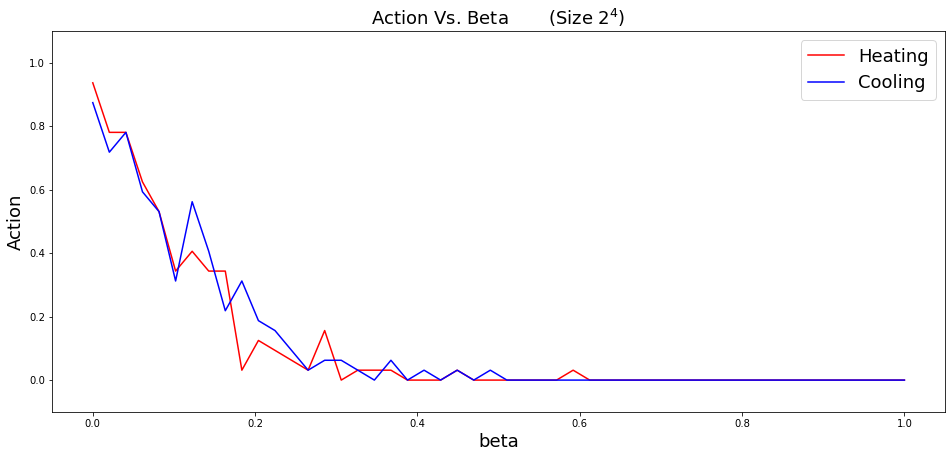

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt


N = 2
latt = np.ones(N**4*4).reshape([N, N, N, N, 4])

rng = np.random.default_rng()


# utility
def moveup(xvec, d):
    #  xvec is mutable
    xvec[d] += 1
    xvec[d] = xvec[d] % N-1   # stays between [0, 1, ..., N-1]
    return None


def movedown(xvec, d):
    #  xvec is mutable
    xvec[d] -= 1
    xvec[d] = xvec[d] % N-1
    return None


def coldstart():
    latt[:] = 1
    return None


def randomstart():

    sites = itertools.product(range(N), range(N), range(N), range(N), range(4))

    for site in sites:

        spin = rng.integers(2)
        if spin == 0:
            spin = -1

        latt[site] = spin

    return None


def update(beta):

    sites = itertools.product(range(N), range(N), range(N), range(N), range(4))

    action = 0.

    for site in sites:

        *x, d = site

        # following M. Creutz
        # staples around link(1->4)
        #    dperp        6--5
        #    ^            |  |
        #    |            1--4
        #    |            |  |
        #    -----> d     2--3

        staplesum = 0.
        for dperp in range(4):
            if dperp != d:

                # plaquette 1234
                movedown(x, dperp)
                staple = latt[x[0], x[1], x[2], x[3], dperp]
                staple *= latt[x[0], x[1], x[2], x[3], d]
                moveup(x, d)
                staple *= latt[x[0], x[1], x[2], x[3], dperp]
                moveup(x, dperp)
                staplesum += staple

                # plaquette 4561
                staple = latt[x[0], x[1], x[2], x[3], dperp]
                moveup(x, dperp)
                movedown(x, d)
                staple *= latt[x[0], x[1], x[2], x[3], d]
                movedown(x, dperp)
                staple *= latt[x[0], x[1], x[2], x[3], dperp]
                staplesum += staple

                # # upper part:
                # moveup(x, d)
                # link1 = latt[x[0], x[1], x[2], x[3], dperp]
                # moveup(x, dperp)
                # movedown(x, d)
                # link2 = latt[x[0], x[1], x[2], x[3], d]
                # movedown(x, dperp)  # back to 0
                # link3 = latt[x[0], x[1], x[2], x[3], dperp]
                # staplesum += link1 * link2 * link3

                # # lower part:
                # moveup(x, d)
                # movedown(x, dperp)
                # link4 = latt[x[0], x[1], x[2], x[3], dperp]
                # movedown(x, d)
                # link5 = latt[x[0], x[1], x[2], x[3], d]
                # link6 = latt[x[0], x[1], x[2], x[3], dperp]
                # moveup(x, dperp)
                # staplesum += link4 * link5 * link6


        # calculate the Boltzmann weight
        bplus = np.exp(beta*staplesum)
        bminus = np.exp(-beta*staplesum)
        bplus = bplus/(bplus+bminus)

        # the heatbath algorithm
        r = rng.uniform()

        if r < bplus:
            latt[site] = 1
            action += staplesum
        else:
            latt[site] = -1
            action -= staplesum

    return 1. - action/(N**4*4.*6.)


def main(beta_arr):
    coldstart()
    actionn = np.zeros(len(beta_arr))
    for i, beta in enumerate(beta_arr):
        action = update(beta)
        actionn[i] = action
    return actionn



beta_arr1 = np.linspace(1., 0., 50)
beta_arr2 = np.linspace(0., 1., 50)


act_heating = main(beta_arr1)
act_cooling = main(beta_arr2)

plt.subplots(figsize=(16, 7))
plt.plot(beta_arr1,act_heating, color='red',label= 'Heating' )
plt.plot(beta_arr2,act_cooling, color='blue',label= 'Cooling')
plt.xlabel("beta", fontsize=18)
plt.ylabel("Action", fontsize=18)
plt.title("Action Vs. Beta       (Size $%.f^4$)"%(N), fontsize=18)
plt.legend(loc="upper right", fontsize=18)
plt.ylim([-0.1, 1.1])
plt.show()

0.9030430683234217
-------------------------------------------------------------------


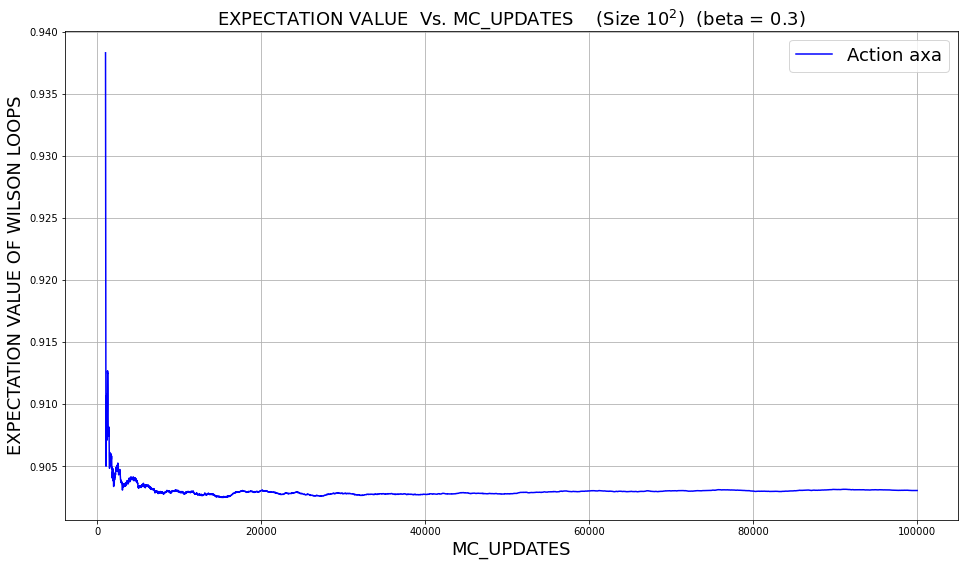

In [9]:
#For 2 Dimension 




N = 10
Dime = 2
latt = np.ones(N**2*2).reshape([N, N, 2])

rng = np.random.default_rng()


# utility
def moveup(xvec, d):
    #  xvec is mutable
    xvec[d] += 1
    xvec[d] = xvec[d] % N   # stays between [0, 1, ..., N-1]
    return None


def movedown(xvec, d):
    #  xvec is mutable
    xvec[d] -= 1
    xvec[d] = xvec[d] % N
    return None


def coldstart():
    latt[:] = 1
    return None


def randomstart():

    sites = itertools.product(range(N), range(N), range(2))

    for site in sites:

        spin = rng.integers(2)
        if spin == 0:
            spin = -1

        latt[site] = spin

    return None


def update(beta):

    sites = itertools.product(range(N), range(N), range(2))

    action = 0.

    for site in sites:

        *x, d = site

        # following M. Creutz
        # staples around link(1->4)
        #    dperp        6--5
        #    ^            |  |
        #    |            1--4
        #    |            |  |
        #    -----> d     2--3

        staplesum = 0.
        for dperp in range(2):
            if dperp != d:

                # plaquette 1234
                movedown(x, dperp)
                staple = latt[x[0], x[1], dperp]
                staple *= latt[x[0], x[1], d]
                moveup(x, d)
                staple *= latt[x[0], x[1], dperp]
                moveup(x, dperp)
                staplesum += staple

                # plaquette 4561
                staple = latt[x[0], x[1], dperp]
                moveup(x, dperp)
                movedown(x, d)
                staple *= latt[x[0], x[1], d]
                movedown(x, dperp)
                staple *= latt[x[0], x[1],  dperp]
                staplesum += staple

                # # upper part:
                # moveup(x, d)
                # link1 = latt[x[0], x[1], x[2], x[3], dperp]
                # moveup(x, dperp)
                # movedown(x, d)
                # link2 = latt[x[0], x[1], x[2], x[3], d]
                # movedown(x, dperp)  # back to 0
                # link3 = latt[x[0], x[1], x[2], x[3], dperp]
                # staplesum += link1 * link2 * link3

                # # lower part:
                # moveup(x, d)
                # movedown(x, dperp)
                # link4 = latt[x[0], x[1], x[2], x[3], dperp]
                # movedown(x, d)
                # link5 = latt[x[0], x[1], x[2], x[3], d]
                # link6 = latt[x[0], x[1], x[2], x[3], dperp]
                # moveup(x, dperp)
                # staplesum += link4 * link5 * link6


        # calculate the Boltzmann weight
        bplus = np.exp(beta*staplesum)
        bminus = np.exp(-beta*staplesum)
        bplus = bplus/(bplus+bminus)

        # the heatbath algorithm
        r = rng.uniform()

        if r < bplus:
            latt[site] = 1
            action += staplesum
        else:
            latt[site] = -1
            action -= staplesum

    return 1.-action/N**2/2./6.

#def main(beta_arr):
#    coldstart()
#    actionn = np.zeros(len(beta_arr))
#    for i, beta in enumerate(beta_arr):
#        action = update(beta)
#        actionn[i] = action
#    return actionn
#
#
#
#beta_arr1 = np.linspace(1., 0., 100)
#beta_arr2 = np.linspace(0., 1., 100)
#
#
#act_heating = main(beta_arr1)
#act_cooling = main(beta_arr2)
#
#plt.subplots(figsize=(16, 7))
#plt.plot(beta_arr1,act_heating, color='red',label= 'Heating' )
#plt.plot(beta_arr2,act_cooling, color='blue',label= 'Cooling')
#plt.xlabel("beta", fontsize=18)
#plt.ylabel("Action", fontsize=18)
#plt.title("Action Vs. Beta       (Size $%.f^%.f$)"%(N,Dime), fontsize=18)
#plt.legend(loc="upper right", fontsize=18)
#plt.ylim([-0.1, 1.1])
#plt.show()

def expectation_axa(beta,N_0,MC_steps):
    coldstart()
    exp_action_axa_lst = []
    mcstep_lst = []
    exp_action_axa = 0.0
    count = 0.0
    for i in range(MC_steps):
        action = update(beta)
        if i > N_0:
            if (i % 10) == 0:
                count += 1 
                exp_action_axa += action
                exp_action_axa_lst.append((exp_action_axa/count))
                mcstep_lst.append(i)            
    print(exp_action_axa_lst[-1])
    return exp_action_axa_lst, mcstep_lst

beta_value = 0.3
n_0 = 1000
mc_steps = 10000

exp_action_axa, mcstep_lst = expectation_axa(beta_value,n_0,mc_steps)

print("-------------------------------------------------------------------")
plt.subplots(figsize=(16, 9))
plt.plot(mcstep_lst, exp_action_axa, color='blue',label= 'Action axa' )
plt.xlabel("MC_UPDATES", fontsize=18)
plt.ylabel("EXPECTATION VALUE OF WILSON LOOPS", fontsize=18)
plt.title("EXPECTATION VALUE  Vs. MC_UPDATES    (Size $%.f^2$)  (beta = %.1f)"%(N,beta_value), fontsize=18)
plt.legend( fontsize=18)
plt.grid(True)
plt.show()




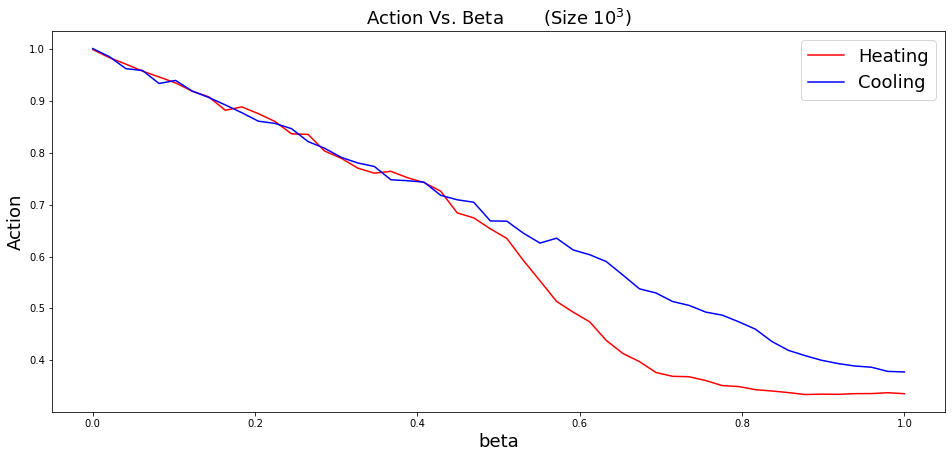

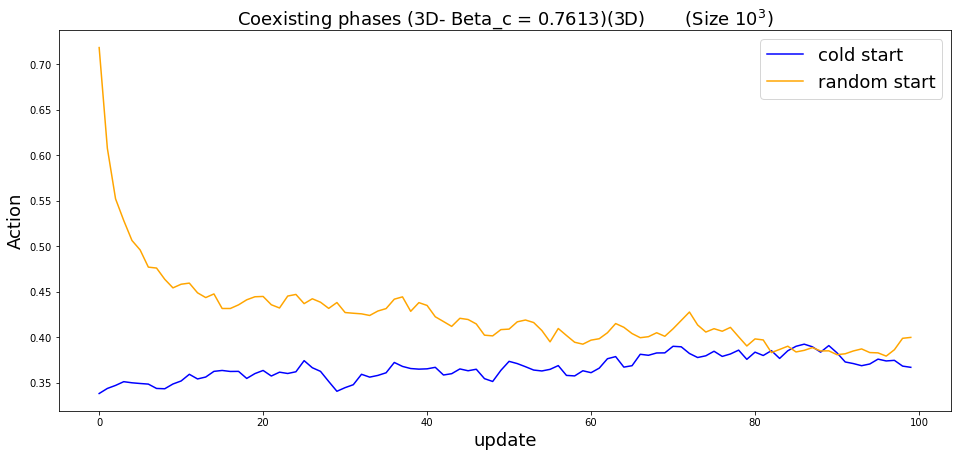

In [11]:
#For 3 Dimension 




N = 10
Dime = 3
latt = np.ones(N**3*3).reshape([N, N, N, 3])

rng = np.random.default_rng()


# utility
def moveup(xvec, d):
    #  xvec is mutable
    xvec[d] += 1
    xvec[d] = xvec[d] % N   # stays between [0, 1, ..., N-1]
    return None


def movedown(xvec, d):
    #  xvec is mutable
    xvec[d] -= 1
    xvec[d] = xvec[d] % N
    return None


def coldstart():
    latt[:] = 1
    return None


def randomstart():

    sites = itertools.product(range(N), range(N),range(N), range(3))

    for site in sites:

        spin = rng.integers(2)
        if spin == 0:
            spin = -1

        latt[site] = spin

    return None


def update(beta):

    sites = itertools.product(range(N), range(N),range(N), range(3))

    action = 0.

    for site in sites:

        *x, d = site

        # following M. Creutz
        # staples around link(1->4)
        #    dperp        6--5
        #    ^            |  |
        #    |            1--4
        #    |            |  |
        #    -----> d     2--3

        staplesum = 0.
        for dperp in range(3):
            if dperp != d:

                # plaquette 1234
                movedown(x, dperp)
                staple = latt[x[0], x[1], x[2], dperp]
                staple *= latt[x[0], x[1], x[2], d]
                moveup(x, d)
                staple *= latt[x[0], x[1], x[2], dperp]
                moveup(x, dperp)
                staplesum += staple

                # plaquette 4561
                staple = latt[x[0], x[1], x[2], dperp]
                moveup(x, dperp)
                movedown(x, d)
                staple *= latt[x[0], x[1], x[2], d]
                movedown(x, dperp)
                staple *= latt[x[0], x[1], x[2],  dperp]
                staplesum += staple



        # calculate the Boltzmann weight
        bplus = np.exp(beta*staplesum)
        bminus = np.exp(-beta*staplesum)
        bplus = bplus/(bplus+bminus)

        # the heatbath algorithm
        r = rng.uniform()

        if r < bplus:
            latt[site] = 1
            action += staplesum
        else:
            latt[site] = -1
            action -= staplesum

    return 1. - action/N**3/3./6.

def main(beta_arr):
    coldstart()
    actionn = np.zeros(len(beta_arr))
    for i, beta in enumerate(beta_arr):
        action = update(beta)
        actionn[i] = action
    return actionn



beta_arr1 = np.linspace(1., 0., 50)
beta_arr2 = np.linspace(0., 1., 50)


act_heating = main(beta_arr1)
act_cooling = main(beta_arr2)

plt.subplots(figsize=(16, 7))
plt.plot(beta_arr1,act_heating, color='red',label= 'Heating' )
plt.plot(beta_arr2,act_cooling, color='blue',label= 'Cooling')
plt.xlabel("beta", fontsize=18)
plt.ylabel("Action", fontsize=18)
plt.title("Action Vs. Beta       (Size $%.f^%.f$)"%(N,Dime), fontsize=18)
plt.legend(loc="upper right", fontsize=18)
plt.show()


def main(beta_arr):
    coldstart()
    actionn = np.zeros(len(beta_arr))
    for i, beta  in enumerate(beta_arr):
        action = update(beta)
        actionn[i] = action
    return actionn

def main2(beta_arr):
    randomstart()
    actionn = np.zeros(len(beta_arr))
    for i, beta  in enumerate(beta_arr):
        action = update(beta)
        actionn[i] = action
    return actionn



beta_arr1 = np.ones(100)*0.7613


act_coldstart = main(beta_arr1)

act_randomstart = main2(beta_arr1)

plt.subplots(figsize=(16, 7))
plt.plot(act_coldstart, color='blue',label= 'cold start' )
plt.plot(act_randomstart, color='orange',label= 'random start' )
plt.xlabel("update", fontsize=18)
plt.ylabel("Action", fontsize=18)
plt.title("Coexisting phases (3D- Beta_c = 0.7613)(3D)       (Size $%.f^3$)"%(N), fontsize=18)
plt.legend( fontsize=18)
plt.show()





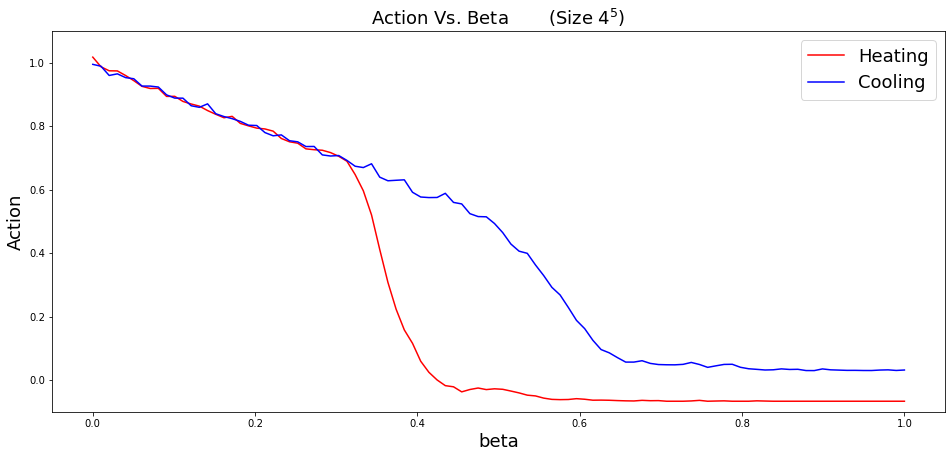

In [4]:
N = 4
latt = np.ones(N**5*5).reshape([N, N, N, N, N, 5])

rng = np.random.default_rng()


# utility
def moveup(xvec, d):
    #  xvec is mutable
    xvec[d] += 1
    xvec[d] = xvec[d] % N   # stays between [0, 1, ..., N-1]
    return None


def movedown(xvec, d):
    #  xvec is mutable
    xvec[d] -= 1
    xvec[d] = xvec[d] % N
    return None


def coldstart():
    latt[:] = 1
    return None


def randomstart():

    sites = itertools.product(range(N), range(N), range(N), range(N), range(N), range(5))

    for site in sites:

        spin = rng.integers(2)
        if spin == 0:
            spin = -1

        latt[site] = spin

    return None


def update(beta):

    sites = itertools.product(range(N), range(N), range(N), range(N), range(N), range(5))

    action = 0.

    for site in sites:

        *x, d = site

        # following M. Creutz
        # staples around link(1->4)
        #    dperp        6--5
        #    ^            |  |
        #    |            1--4
        #    |            |  |
        #    -----> d     2--3

        staplesum = 0.
        for dperp in range(4):
            if dperp != d:

                # plaquette 1234
                movedown(x, dperp)
                staple = latt[x[0], x[1], x[2], x[3], x[4], dperp]
                staple *= latt[x[0], x[1], x[2], x[3], x[4], d]
                moveup(x, d)
                staple *= latt[x[0], x[1], x[2], x[3], x[4], dperp]
                moveup(x, dperp)
                staplesum += staple

                # plaquette 4561
                staple = latt[x[0], x[1], x[2], x[3], x[4], dperp]
                moveup(x, dperp)
                movedown(x, d)
                staple *= latt[x[0], x[1], x[2], x[3], x[4], d]
                movedown(x, dperp)
                staple *= latt[x[0], x[1], x[2], x[3], x[4], dperp]
                staplesum += staple

                # # upper part:
                # moveup(x, d)
                # link1 = latt[x[0], x[1], x[2], x[3], dperp]
                # moveup(x, dperp)
                # movedown(x, d)
                # link2 = latt[x[0], x[1], x[2], x[3], d]
                # movedown(x, dperp)  # back to 0
                # link3 = latt[x[0], x[1], x[2], x[3], dperp]
                # staplesum += link1 * link2 * link3

                # # lower part:
                # moveup(x, d)
                # movedown(x, dperp)
                # link4 = latt[x[0], x[1], x[2], x[3], dperp]
                # movedown(x, d)
                # link5 = latt[x[0], x[1], x[2], x[3], d]
                # link6 = latt[x[0], x[1], x[2], x[3], dperp]
                # moveup(x, dperp)
                # staplesum += link4 * link5 * link6


        # calculate the Boltzmann weight
        bplus = np.exp(beta*staplesum)
        bminus = np.exp(-beta*staplesum)
        bplus = bplus/(bplus+bminus)

        # the heatbath algorithm
        r = rng.uniform()

        if r < bplus:
            latt[site] = 1
            action += staplesum
        else:
            latt[site] = -1
            action -= staplesum

    return 1. - action/N**5/5./6.


def main(beta_arr):
    coldstart()
    actionn = np.zeros(len(beta_arr))
    for i, beta in enumerate(beta_arr):
        action = update(beta)
        actionn[i] = action
    return actionn



beta_arr1 = np.linspace(1., 0., 100)
beta_arr2 = np.linspace(0., 1., 100)


act_heating = main(beta_arr1)
act_cooling = main(beta_arr2)

plt.subplots(figsize=(16, 7))
plt.plot(beta_arr1,act_heating, color='red',label= 'Heating' )
plt.plot(beta_arr2,act_cooling, color='blue',label= 'Cooling')
plt.xlabel("beta", fontsize=18)
plt.ylabel("Action", fontsize=18)
plt.title("Action Vs. Beta       (Size $%.f^5$)"%(N), fontsize=18)
plt.legend(loc="upper right", fontsize=18)
plt.ylim([-0.1, 1.1])
plt.show()



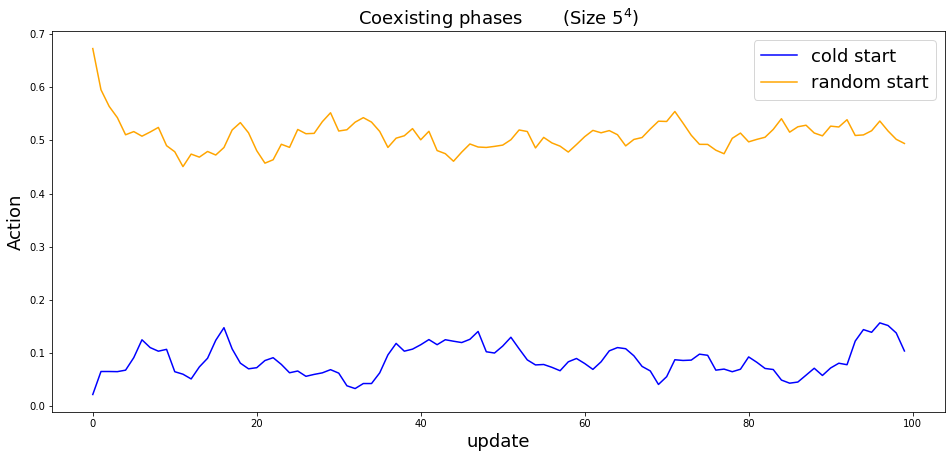

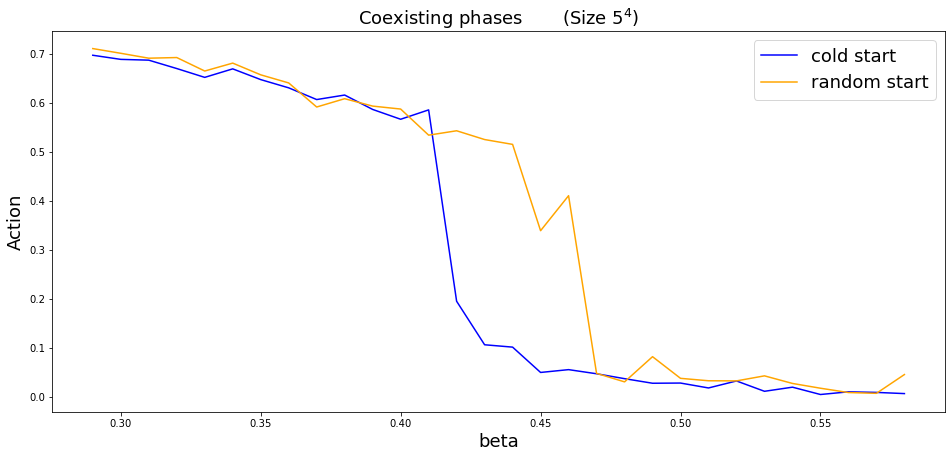

In [5]:
N = 5
latt = np.ones(N**4*4).reshape([N, N, N, N, 4])

rng = np.random.default_rng()


# utility
def moveup(xvec, d):
    #  xvec is mutable
    xvec[d] += 1
    xvec[d] = xvec[d] % N   # stays between [0, 1, ..., N-1]
    return None


def movedown(xvec, d):
    #  xvec is mutable
    xvec[d] -= 1
    xvec[d] = xvec[d] % N
    return None


def coldstart():
    latt[:] = 1
    return None


def randomstart():

    sites = itertools.product(range(N), range(N), range(N), range(N), range(4))

    for site in sites:

        spin = rng.integers(2)
        if spin == 0:
            spin = -1

        latt[site] = spin

    return None


def update(beta):

    sites = itertools.product(range(N), range(N), range(N), range(N), range(4))

    action = 0.

    for site in sites:

        *x, d = site

        # following M. Creutz
        # staples around link(1->4)
        #    dperp        6--5
        #    ^            |  |
        #    |            1--4
        #    |            |  |
        #    -----> d     2--3

        staplesum = 0.
        for dperp in range(4):
            if dperp != d:

                # plaquette 1234
                movedown(x, dperp)
                staple = latt[x[0], x[1], x[2], x[3], dperp]
                staple *= latt[x[0], x[1], x[2], x[3], d]
                moveup(x, d)
                staple *= latt[x[0], x[1], x[2], x[3], dperp]
                moveup(x, dperp)
                staplesum += staple

                # plaquette 4561
                staple = latt[x[0], x[1], x[2], x[3], dperp]
                moveup(x, dperp)
                movedown(x, d)
                staple *= latt[x[0], x[1], x[2], x[3], d]
                movedown(x, dperp)
                staple *= latt[x[0], x[1], x[2], x[3], dperp]
                staplesum += staple

                # # upper part:
                # moveup(x, d)
                # link1 = latt[x[0], x[1], x[2], x[3], dperp]
                # moveup(x, dperp)
                # movedown(x, d)
                # link2 = latt[x[0], x[1], x[2], x[3], d]
                # movedown(x, dperp)  # back to 0
                # link3 = latt[x[0], x[1], x[2], x[3], dperp]
                # staplesum += link1 * link2 * link3

                # # lower part:
                # moveup(x, d)
                # movedown(x, dperp)
                # link4 = latt[x[0], x[1], x[2], x[3], dperp]
                # movedown(x, d)
                # link5 = latt[x[0], x[1], x[2], x[3], d]
                # link6 = latt[x[0], x[1], x[2], x[3], dperp]
                # moveup(x, dperp)
                # staplesum += link4 * link5 * link6


        # calculate the Boltzmann weight
        bplus = np.exp(beta*staplesum)
        bminus = np.exp(-beta*staplesum)
        bplus = bplus/(bplus+bminus)

        # the heatbath algorithm
        r = rng.uniform()

        if r < bplus:
            latt[site] = 1
            action += staplesum
        else:
            latt[site] = -1
            action -= staplesum

    return 1. - action/N**4/4./6.



def main(beta_arr):
    coldstart()
    actionn = np.zeros(len(beta_arr))
    for i, beta  in enumerate(beta_arr):
        action = update(beta)
        actionn[i] = action
    return actionn

def main2(beta_arr):
    randomstart()
    actionn = np.zeros(len(beta_arr))
    for i, beta  in enumerate(beta_arr):
        action = update(beta)
        actionn[i] = action
    return actionn



beta_arr1 = np.ones(100)*0.44068679351


act_coldstart = main(beta_arr1)

act_randomstart = main2(beta_arr1)

plt.subplots(figsize=(16, 7))
plt.plot(act_coldstart, color='blue',label= 'cold start' )
plt.plot(act_randomstart, color='orange',label= 'random start' )
plt.xlabel("update", fontsize=18)
plt.ylabel("Action", fontsize=18)
plt.title("Coexisting phases       (Size $%.f^4$)"%(N), fontsize=18)
plt.legend( fontsize=18)
plt.show()



def coexi_cold(beta_arr):
    beta_arrcold = np.ones(100)
    action_cold = np.zeros(len(beta_arr))
    for i, betavalu  in enumerate(beta_arr):
        action = main(beta_arrcold*betavalu)
        action_cold[i] = action[-1:]
    return action_cold



def coexi_random(beta_arr):
    beta_arrcold = np.ones(100)
    action_cold = np.zeros(len(beta_arr))
    for i, betavalu  in enumerate(beta_arr):
        action = main2(beta_arrcold*betavalu)
        action_cold[i] = action[-1:]
    return action_cold

Bs = np.arange(0.29,0.59 , 0.01)
cold_co = coexi_cold(Bs)
ramdom_co = coexi_random(Bs)

plt.subplots(figsize=(16, 7))
plt.plot(Bs,cold_co, color='blue',label= 'cold start' )
plt.plot(Bs, ramdom_co, color='orange',label= 'random start' )
plt.xlabel("beta", fontsize=18)
plt.ylabel("Action", fontsize=18)
plt.title("Coexisting phases       (Size $%.f^4$)"%(N), fontsize=18)
plt.legend( fontsize=18)
plt.show()